In [33]:
pip install symforce

Note: you may need to restart the kernel to use updated packages.


In [34]:
import symforce.symbolic as sf
sf.Rot3()

<Rot3 <Q xyzw=[0, 0, 0, 1]>>

In [35]:
import symforce.symbolic as sf

In [36]:
pose = sf.Pose2(
    t=sf.V2.symbolic("t"),
    R=sf.Rot2.symbolic("R")
)
landmark = sf.V2.symbolic("L")

In [37]:
landmark_body = pose.inverse() * landmark

In [38]:
landmark_body.jacobian(pose)

[-L0*R_im + L1*R_re + t0*R_im - t1*R_re, -R_re, -R_im]
[-L0*R_re - L1*R_im + t0*R_re + t1*R_im, R_im, -R_re]

In [39]:
sf.atan2(landmark_body[1], landmark_body[0])

atan2(-L0*R_im + L1*R_re - (-t0*R_im + t1*R_re), L0*R_re + L1*R_im - (t0*R_re + t1*R_im))

In [40]:
sf.V3.symbolic("x").norm(epsilon=sf.epsilon())

sqrt(x0**2 + x1**2 + x2**2)

In [41]:
import symforce
symforce.set_epsilon_to_symbol()

AlreadyUsedEpsilon: Cannot set return value of epsilon after it has already been called.

In [ ]:
import numpy as np
from symforce.values import Values

num_poses = 3
num_landmarks = 3

initial_values = Values(
    poses=[sf.Pose2.identity()] * num_poses,
    landmarks=[sf.V2(-2, 2), sf.V2(1, -3), sf.V2(5, 2)],
    distances=[1.7, 1.4],
    angles=np.deg2rad([[145, 335, 55], [185, 310, 70], [215, 310, 70]]).tolist(),
    epsilon=sf.numeric_epsilon,
)

In [ ]:
def bearing_residual(
    pose: sf.Pose2, landmark: sf.V2, angle: sf.Scalar, epsilon: sf.Scalar
) -> sf.V1:
    t_body = pose.inverse() * landmark
    predicted_angle = sf.atan2(t_body[1], t_body[0], epsilon=epsilon)
    return sf.V1(sf.wrap_angle(predicted_angle - angle))

In [ ]:
def odometry_residual(
    pose_a: sf.Pose2, pose_b: sf.Pose2, dist: sf.Scalar, epsilon: sf.Scalar
) -> sf.V1:
    return sf.V1((pose_b.t - pose_a.t).norm(epsilon=epsilon) - dist)

In [ ]:
from symforce.opt.factor import Factor

factors = []

# Bearing factors
for i in range(num_poses):
    for j in range(num_landmarks):
        factors.append(Factor(
            residual=bearing_residual,
            keys=[f"poses[{i}]", f"landmarks[{j}]", f"angles[{i}][{j}]", "epsilon"],
        ))

# Odometry factors
for i in range(num_poses - 1):
    factors.append(Factor(
        residual=odometry_residual,
        keys=[f"poses[{i}]", f"poses[{i + 1}]", f"distances[{i}]", "epsilon"],
    ))

codegen.__init__():123 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code, you should set epsilon to either a symbol
    (recommended) or a small numerical value like `sf.numeric_epsilon`.  You should do
    this before importing any other code from symforce, e.g. with

        import symforce
        symforce.set_epsilon_to_symbol()

    or

        import symforce
        symforce.set_epsilon_to_number()

    For more information on use of epsilon to prevent singularities, take a look at the
    Epsilon Tutorial: https://symforce.org/tutorials/epsilon_tutorial.html

codegen.__init__():123 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code

In [ ]:
from symforce.opt.optimizer import Optimizer

optimizer = Optimizer(
    factors=factors,
    optimized_keys=[f"poses[{i}]" for i in range(num_poses)],
    # So that we save more information about each iteration, to visualize later:
    debug_stats=True,
)

codegen.__init__():123 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code, you should set epsilon to either a symbol
    (recommended) or a small numerical value like `sf.numeric_epsilon`.  You should do
    this before importing any other code from symforce, e.g. with

        import symforce
        symforce.set_epsilon_to_symbol()

    or

        import symforce
        symforce.set_epsilon_to_number()

    For more information on use of epsilon to prevent singularities, take a look at the
    Epsilon Tutorial: https://symforce.org/tutorials/epsilon_tutorial.html

codegen.__init__():123 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code

In [ ]:
result = optimizer.optimize(initial_values)

[2022-12-03 09:07:16.256] [info] LM<sym::Optimize> [iter    0] lambda: 1.000e+00, error prev/linear/new: 5.143/2.872/2.203, rel reduction: 0.57166
[2022-12-03 09:07:16.257] [info] LM<sym::Optimize> [iter    1] lambda: 2.500e-01, error prev/linear/new: 2.203/0.087/0.074, rel reduction: 0.96655
[2022-12-03 09:07:16.257] [info] LM<sym::Optimize> [iter    2] lambda: 6.250e-02, error prev/linear/new: 0.074/0.006/0.006, rel reduction: 0.91401
[2022-12-03 09:07:16.258] [info] LM<sym::Optimize> [iter    3] lambda: 1.562e-02, error prev/linear/new: 0.006/0.001/0.001, rel reduction: 0.90323
[2022-12-03 09:07:16.261] [info] LM<sym::Optimize> [iter    4] lambda: 3.906e-03, error prev/linear/new: 0.001/0.000/0.000, rel reduction: 0.60930
[2022-12-03 09:07:16.261] [info] LM<sym::Optimize> [iter    5] lambda: 9.766e-04, error prev/linear/new: 0.000/0.000/0.000, rel reduction: 0.08144
[2022-12-03 09:07:16.262] [info] LM<sym::Optimize> [iter    6] lambda: 2.441e-04, error prev/linear/new: 0.000/0.000/0

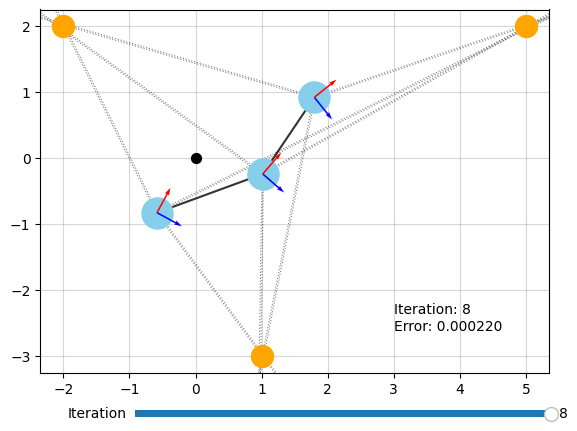

In [ ]:
from symforce.examples.robot_2d_localization.plotting import plot_solution
plot_solution(optimizer, result)

In [ ]:
sf.Pose3.identity()

<Pose3 R=<Rot3 <Q xyzw=[0, 0, 0, 1]>>, t=(0, 0, 0)>

In [ ]:
import sym
sym.Pose3.identity()

<Pose3 [0, 0, 0, 1, 0, 0, 0]>

In [ ]:
sym::Pose3<double>::Identity()

SyntaxError: invalid syntax (2944227102.py, line 1)

In [ ]:
from symforce.codegen import Codegen, CppConfig

codegen = Codegen.function(bearing_residual, config=CppConfig())

codegen.__init__():123 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code, you should set epsilon to either a symbol
    (recommended) or a small numerical value like `sf.numeric_epsilon`.  You should do
    this before importing any other code from symforce, e.g. with

        import symforce
        symforce.set_epsilon_to_symbol()

    or

        import symforce
        symforce.set_epsilon_to_number()

    For more information on use of epsilon to prevent singularities, take a look at the
    Epsilon Tutorial: https://symforce.org/tutorials/epsilon_tutorial.html



In [ ]:
codegen_linearization = codegen.with_linearization(
    which_args=["pose"]
)

codegen.__init__():123 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code, you should set epsilon to either a symbol
    (recommended) or a small numerical value like `sf.numeric_epsilon`.  You should do
    this before importing any other code from symforce, e.g. with

        import symforce
        symforce.set_epsilon_to_symbol()

    or

        import symforce
        symforce.set_epsilon_to_number()

    For more information on use of epsilon to prevent singularities, take a look at the
    Epsilon Tutorial: https://symforce.org/tutorials/epsilon_tutorial.html



In [ ]:
metadata = codegen_linearization.generate_function()
print(open(metadata.generated_files[0]).read())

// -----------------------------------------------------------------------------
// This file was autogenerated by symforce from template:
//     function/FUNCTION.h.jinja
// Do NOT modify by hand.
// -----------------------------------------------------------------------------

#pragma once

#include <Eigen/Dense>

#include <sym/pose2.h>

namespace sym {

/**
 * This function was autogenerated from a symbolic function. Do not modify by hand.
 *
 * Symbolic function: bearing_residual
 *
 * Args:
 *     pose: Pose2
 *     landmark: Matrix21
 *     angle: Scalar
 *     epsilon: Scalar
 *
 * Outputs:
 *     res: Matrix11
 *     jacobian: (1x3) jacobian of res wrt arg pose (3)
 *     hessian: (3x3) Gauss-Newton hessian for arg pose (3)
 *     rhs: (3x1) Gauss-Newton rhs for arg pose (3)
 */
template <typename Scalar>
void BearingFactor(const sym::Pose2<Scalar>& pose, const Eigen::Matrix<Scalar, 2, 1>& landmark,
                   const Scalar angle, const Scalar epsilon,
                  

In [ ]:
%%bash
wget https://raw.githubusercontent.com/symforce-org/symforce/main/gen/cpp/sym/pose2.h -P ./sym

--2022-12-03 09:13:23--  https://raw.githubusercontent.com/symforce-org/symforce/main/gen/cpp/sym/pose2.h
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8015 (7.8K) [text/plain]
Saving to: ‘./sym/pose2.h’

     0K .......                                               100% 16.5M=0s

2022-12-03 09:13:24 (16.5 MB/s) - ‘./sym/pose2.h’ saved [8015/8015]

